In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob
from tkinter import *

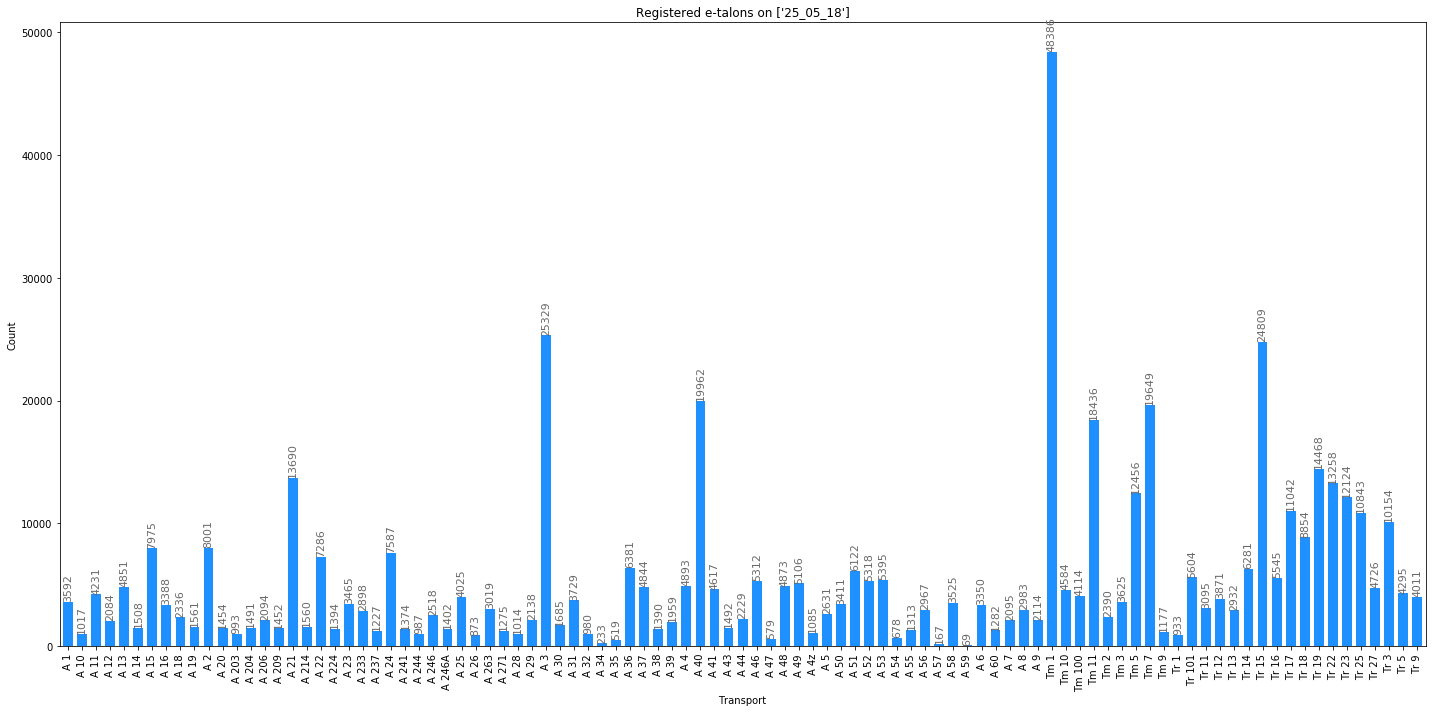

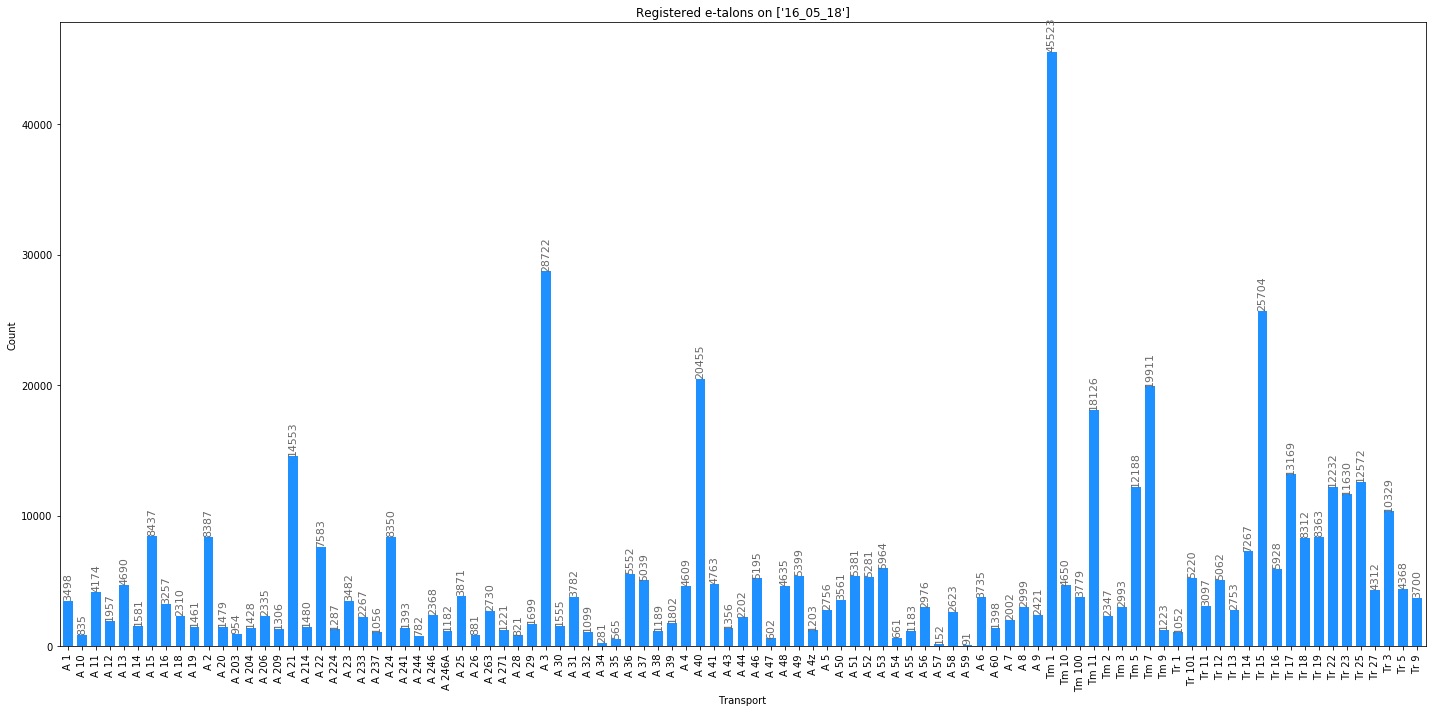

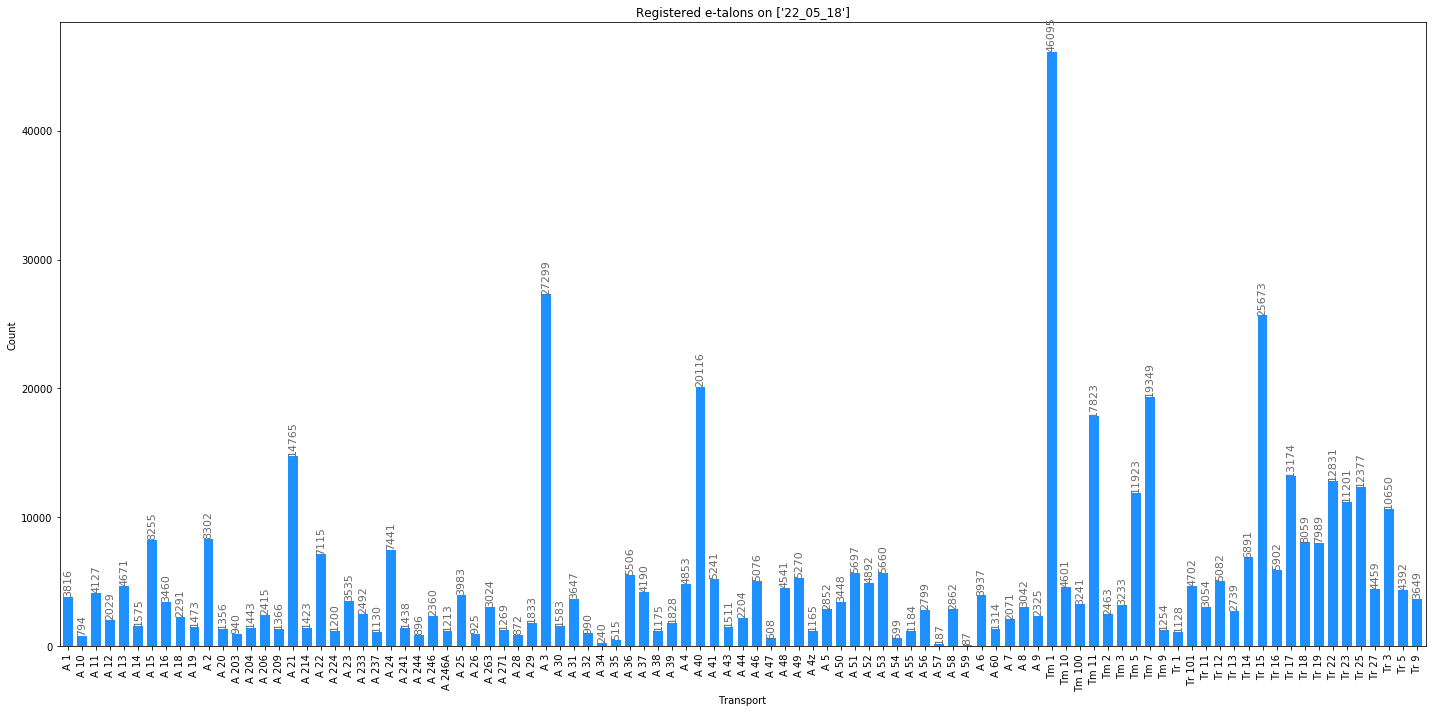

In [3]:
def check(*args):
    
        data=pd.read_csv(variable.get())
        plt.figure(figsize=(20,10))
        transp = data.groupby(['TMarsruts'])
        transp = data.pivot_table(index=['TMarsruts'], aggfunc='size')
        ax = transp.plot(kind='bar', color='dodgerblue', width=0.7)
        res = re.findall("(?<=Dati)\w+", variable.get())
        plt.title('Registered e-talons on '+str(res))
        plt.ylabel('Count')
        plt.xlabel('Transport')
        plt.tight_layout()
        for i in ax.patches:
            ax.text(i.get_x(), i.get_height()+200, \
                str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',rotation=90)
        plt.show()

OPTIONS = glob.glob('ValidDati*.txt')

master = Tk()
master.geometry("200x100")

variable = StringVar(master)
variable.set(OPTIONS[0]) 

w = OptionMenu(master, variable, *OPTIONS)
w.pack()

button = Button(master, text="OK", command=check)
button.pack()

mainloop()